In [1]:
# filepath

import pandas as pd
import plotly_express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import data_processing



#regions = pd.read_csv("Data/noc_regions.csv")
#athlete_events = pd.read_csv("Data/athlete_events.csv")


In [2]:
path = data_processing.get_data_path()

df = data_processing.load_data(path)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,5ca27fb69235ffd27c17e2ba3c429c2c171ecb94b0d798...,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,9c35793fee023a0e9a281322f11d7a5755064e765953e3...,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,1af88a8ee2b61c7902ff90232b77a4ae5f885a7f9e8eaa...,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,e3e271d1e908ad77cd65ca6d328071cb9f683f2a465c6c...,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,1400a88af1656f3392825245bca4c46fb48c3bdc3274b0...,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [3]:

processor = data_processing.DataProcessing(df)


In [4]:
processor.df_top10_countries

AttributeError: 'DataProcessing' object has no attribute 'df_top10_countries'

In [5]:
def top_10_countries(df):
    df_ = df.copy()  # good to create a copy 
    df_ = df_[df_["Medal"].isna() == False]
    df_value_counts = df_.value_counts("NOC")
    df_top10 = df_value_counts.head(10)
    df_top10 
    fig = px.bar(df_top10.reset_index().head(10), x="NOC", y=0, title= "Top 10 Countries Medals")
    return fig


#top_10_countries(df)
fig = top_10_countries(df).show()

In [ ]:
def top_10_countries(df):
    df_ = df.copy()  # good to create a copy 
    df_ = df_[df_["Medal"].isna() == False]
    df_value_counts = df_.value_counts("NOC")
    df_top10 = df_value_counts.head(10)
    df_top10 
    fig = px.bar(df_top10.reset_index().head(10), x="NOC", y=0, title= "Top 10 Countries Medals")
    return fig

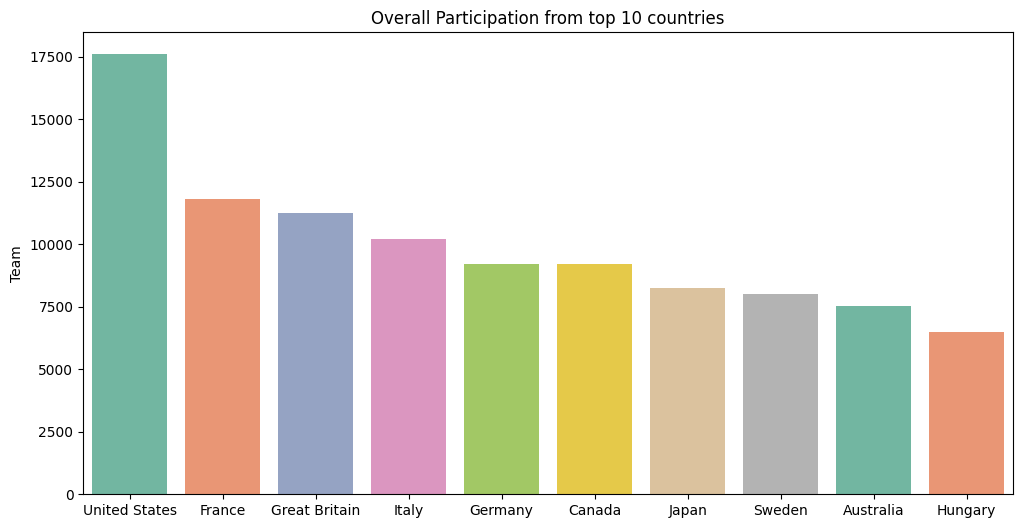

In [7]:
def participation_top_10_countries(df):
    participation_top_10_countrys = df.Team.value_counts().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,6))
    plt.title('Overall Participation from top 10 countries')
    fig = sns.barplot(x=participation_top_10_countrys.index, y=participation_top_10_countrys, palette = 'Set2');
    return fig
    
fig = participation_top_10_countries(df)

In [ ]:
participation_top_10_countrys = athlete_events.Team.value_counts().sort_values(ascending=False).head(10)
#top_10_countries

# Visual overall particapation over all years
plt.figure(figsize=(12,6))
plt.title('Overall Participation from top 10 countries')
sns.barplot(x=participation_top_10_countrys.index, y=participation_top_10_countrys, palette = 'Set2');

In [ ]:
def chinas_particpation(df):
    df_china = df[df.Team == "China"]
    df_china1 = df_china.loc[:, ["ID", "Year"]]
    plt.figure(figsize=(10,15))
    plt.subplot(211)
    



df_china = athlete_events[athlete_events.Team == "China"]
data_china = df_china.loc[:, ["ID", "Year"]]

plt.figure(figsize=(10, 15))
plt.subplot(211)


china = (
    data_china.groupby("Year")["ID"]
    .nunique()
    .plot(
        kind="bar",
        color=sns.color_palette("colorblind"),
        linewidth=1,
    )
)



plt.title("Chinas participation")
plt.xticks(rotation=60)
plt.grid(True, alpha=0.3)
plt.show()